In [1]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data with 
sites = ['site%d' %i for i in range(1,11)]
times = ['time%d' %i for i in range(1,11)]

train_df = pd.read_csv('train_sessions.csv', index_col='session_id', parse_dates=times)
test_df = pd.read_csv('test_sessions.csv', index_col='session_id', parse_dates=times)
pickle_file = 'site_dic.pkl'

In [3]:
train_df.shape, test_df.shape

((253561, 21), (82797, 20))

## Data Cleaning First

In [4]:
# NaN values
train_df[sites] = train_df[sites].fillna(0)
train_df[sites] = train_df[sites].astype(int)


train_df = train_df.sort_values(by='time1') # remove correlation with data order

### Since we know data frame combine with site# & time# 
### let's see ratio between target and non-target


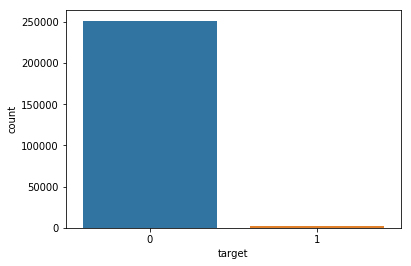

In [5]:
sns.countplot(train_df['target']) # this is a imbalance data

In [6]:
# Let's see what is the most frequenct website all people usually use
top_sites_all = pd.Series(train_df[sites].values.flatten()).value_counts().drop(labels=[0]).sort_values(ascending=False).head(10)
top_sites_all

21     123776
23      87619
782     77055
22      58258
29      54094
167     46405
780     43841
778     38194
52      36085
812     35178
dtype: int64

In [7]:
# Let's see what is most freq website of Alice use
Alice_df = train_df[train_df['target']==1]
other_df = train_df[train_df['target']==0]
top_sites_alice = pd.Series(Alice_df[sites].values.flatten()).value_counts().drop(labels=[0]).sort_values(ascending=False).head(10)
top_sites_alice

77     1382
80     1354
76     1307
29      897
21      857
81      609
879     522
22      522
75      451
82      447
dtype: int64

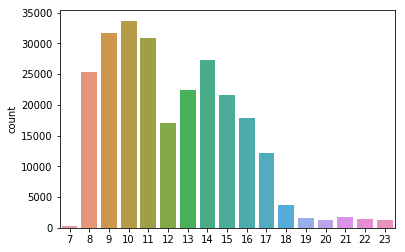

In [8]:
# Let's see website usage time distribution for different people
alice_session_start_time = Alice_df['time1'].apply(lambda ts: ts.hour).values
other_session_start_time = other_df['time1'].apply(lambda ts: ts.hour).values
# fig, ax = plt.subplots(ncols=2, figsize=(10,6))
# ax[0].hist(alice_session_start_time)
# ax[0].set_title('Alice_Start_Time')
# ax[0].set_xlabel('start time(hr)')

# ax[1].hist(other_session_start_time)
# ax[1].set_title('Other_Start_Time')
# ax[1].set_xlabel('start time(hr)')
sns.countplot(other_session_start_time)
# compare with alice and other people most people start to search website around 10
# however alice usually start serach website at 12-13, and 16-18 looks like in lunch time or after working.
# at the work time she doesn't like using website.

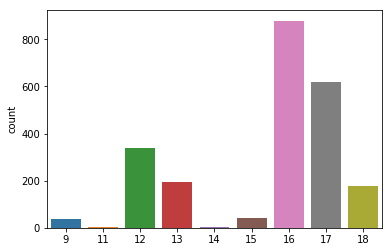

In [9]:
sns.countplot(alice_session_start_time)

In [10]:
# let's see how late can people use their browser
# oops nothing different
alice_session_late = Alice_df[times].applymap(lambda ts: ts.hour).apply(max, axis=1)
other_session_late = other_df[times].applymap(lambda ts: ts.hour).apply(max, axis=1)

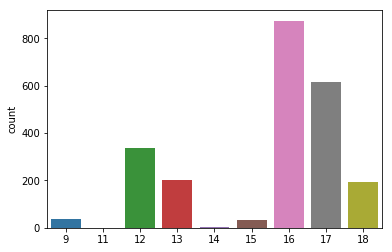

In [11]:
sns.countplot(alice_session_late.astype('int'))

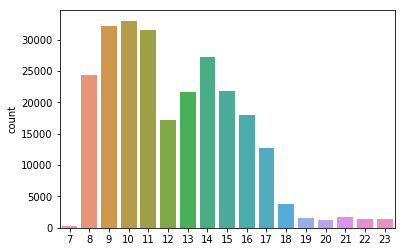

In [12]:
sns.countplot(other_session_late.astype('int'))

In [ ]:
# Let's check duration about time feature
alice_duration = Alice[times].apply(lambda : )